# **Preprocessing**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

In [49]:
from google.colab import files
import io
import pandas as pd


uploaded = files.upload()
for file_name in uploaded.keys():
    data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')

Saving Raw Data.csv to Raw Data.csv


In [51]:
raw_data = pd.read_csv('/content/Raw Data.csv', delimiter=',')

In [52]:
raw_data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


In [53]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   int64  
 6   work_exp       6194 non-null   int64  
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 393.3+ KB
None


Scaling, Encoding and Removing null values

In [54]:
# Identify features and target
categorical_features = ['gender', 'major', 'work_industry']  # Exclude 'race' for now
numerical_features = ['gpa', 'gmat', 'work_exp']  # Numerical features
target = 'race'

# Separate rows with and without missing 'race' values
df_not_null = raw_data[raw_data[target].notnull()]
df_null = raw_data[raw_data[target].isnull()]

# Prepare the features and target for the non-null dataset
X_not_null = df_not_null[categorical_features + numerical_features]
y_not_null = df_not_null[target]

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standard scaling for numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encoding for categorical features
    ]
)

# Preprocess the non-null data
X_not_null_processed = preprocessor.fit_transform(X_not_null)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_not_null_processed, y_not_null)

# Prepare the features for the null dataset
X_null = df_null[categorical_features + numerical_features]
X_null_processed = preprocessor.transform(X_null)

# Predict missing 'race' values
predicted_race = model.predict(X_null_processed)

# Fill missing values in 'race'
raw_data.loc[raw_data[target].isnull(), target] = predicted_race

# Verify that there are no more missing values in 'race'
print(raw_data['race'].isnull().sum())


0


In [64]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           6194 non-null   object 
 5   gmat           6194 non-null   int64  
 6   work_exp       6194 non-null   int64  
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 393.3+ KB
None


In [63]:
raw_data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,Female,True,3.30,Business,Black,710,5,Technology,Admit
3,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


Code to Standardize Features Excluding Admissions

In [62]:
'''
# Remove the 'admission' feature
data = raw_data.copy()
data = data.drop(columns=['admission'])

# Identify features
categorical_features = ['gender', 'major', 'race', 'work_industry', 'international']  # Categorical features
numerical_features = ['gpa', 'gmat', 'work_exp']  # Numerical features

# Step 1: Label Encode Categorical Features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))  # Convert to string to handle NaN
    label_encoders[feature] = le  # Store the encoder

# Step 2: Standard Scale Numerical Features
num_scaler = StandardScaler()
X_num_scaled = num_scaler.fit_transform(data[numerical_features])

# Step 3: Standard Scale Categorical Features (after label encoding)
cat_scaler = StandardScaler()
X_cat_scaled = cat_scaler.fit_transform(data[categorical_features])

# Step 4: Concatenate the Scaled Numerical and Categorical Features
X_processed = np.concatenate((X_num_scaled, X_cat_scaled), axis=1)

# Combine the feature names
all_feature_names = numerical_features + categorical_features

# Create a DataFrame with the processed data
data = pd.DataFrame(X_processed, columns=all_feature_names)

# Display the first few rows of the processed DataFrame
print(data.head())
'''

"\n# Remove the 'admission' feature\ndata = raw_data.copy()\ndata = data.drop(columns=['admission'])\n\n# Identify features\ncategorical_features = ['gender', 'major', 'race', 'work_industry', 'international']  # Categorical features\nnumerical_features = ['gpa', 'gmat', 'work_exp']  # Numerical features\n\n# Step 1: Label Encode Categorical Features\nlabel_encoders = {}\nfor feature in categorical_features:\n    le = LabelEncoder()\n    data[feature] = le.fit_transform(data[feature].astype(str))  # Convert to string to handle NaN\n    label_encoders[feature] = le  # Store the encoder\n\n# Step 2: Standard Scale Numerical Features\nnum_scaler = StandardScaler()\nX_num_scaled = num_scaler.fit_transform(data[numerical_features])\n\n# Step 3: Standard Scale Categorical Features (after label encoding)\ncat_scaler = StandardScaler()\nX_cat_scaled = cat_scaler.fit_transform(data[categorical_features])\n\n# Step 4: Concatenate the Scaled Numerical and Categorical Features\nX_processed = np.co

Code to Standardize Features Excluding  Encoded Admissions

In [65]:
# Assume raw_data is the original DataFrame
data = raw_data.copy()

# Identify features
categorical_features = ['gender', 'major', 'race', 'work_industry', 'international']  # Categorical features (without 'admission')
numerical_features = ['gpa', 'gmat', 'work_exp']  # Numerical features

# Step 1: Encode the 'admission' feature as 0 for 'waitlist' and 1 for 'admit'
data['admission'] = data['admission'].map({'Waitlist': 0, 'Admit': 1})

# Step 2: Label Encode other Categorical Features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))  # Convert to string to handle NaN if any
    label_encoders[feature] = le  # Store the encoder for future use

# Step 3: Standard Scale Numerical Features
num_scaler = StandardScaler()
X_num_scaled = num_scaler.fit_transform(data[numerical_features])

# Step 4: Standard Scale Categorical Features (excluding 'admission')
cat_scaler = StandardScaler()
X_cat_scaled = cat_scaler.fit_transform(data[categorical_features])

# Step 5: Concatenate the Scaled Numerical and Categorical Features, but keep 'admission' as is
X_processed = np.concatenate((X_num_scaled, X_cat_scaled, data[['admission']]), axis=1)

# Combine the feature names (adding 'admission' at the end)
all_feature_names = numerical_features + categorical_features + ['admission']

# Create a DataFrame with the processed data
processed_data = pd.DataFrame(X_processed, columns=all_feature_names)

# Display the first few rows of the processed DataFrame
print(processed_data.head())

        gpa      gmat  work_exp    gender     major      race  work_industry  \
0  0.325261 -0.630806 -1.953750 -1.323505 -1.299339 -1.228405      -0.727969   
1  0.193273  0.586457 -0.016421  0.755569 -0.007716 -0.613507      -0.019409   
2  0.325261  1.195089 -0.016421 -1.323505 -1.299339 -0.613507       1.633897   
3  1.447159  0.789334  0.952244  0.755569  1.283908 -0.613507       1.633897   
4  0.655231 -1.239437 -0.016421  0.755569  1.283908  0.001390      -1.200342   

   international  admission  
0      -0.650579        1.0  
1      -0.650579        NaN  
2       1.537091        1.0  
3      -0.650579        NaN  
4      -0.650579        NaN  


In [66]:
from google.colab import files

processed_data.to_csv('data.csv', index=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **EDA**

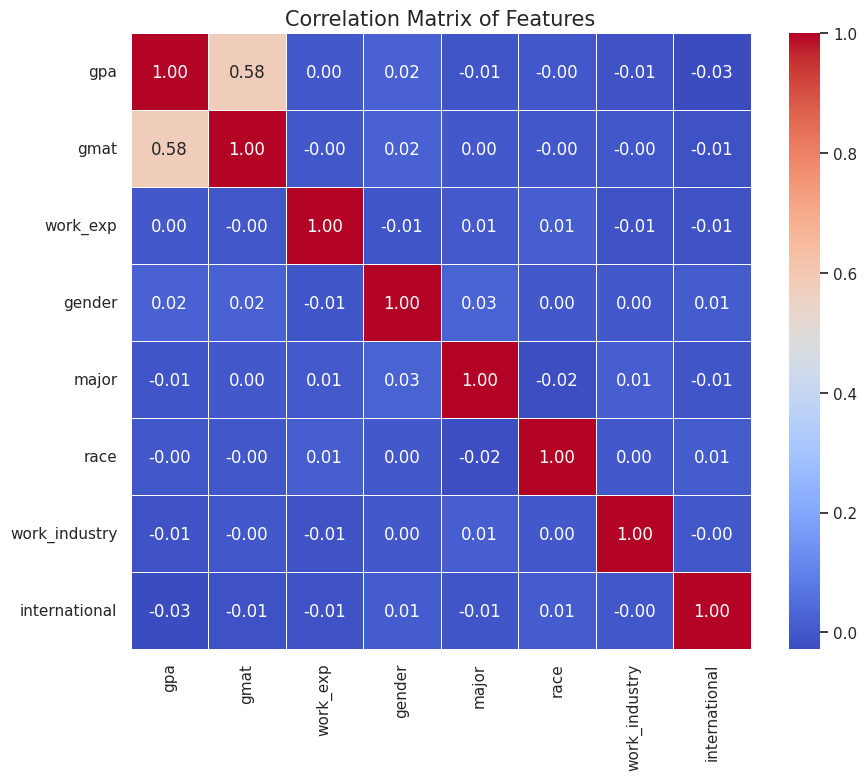

In [10]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Features', size=15)

# Show the plot
plt.show()


# **Clustering**

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np

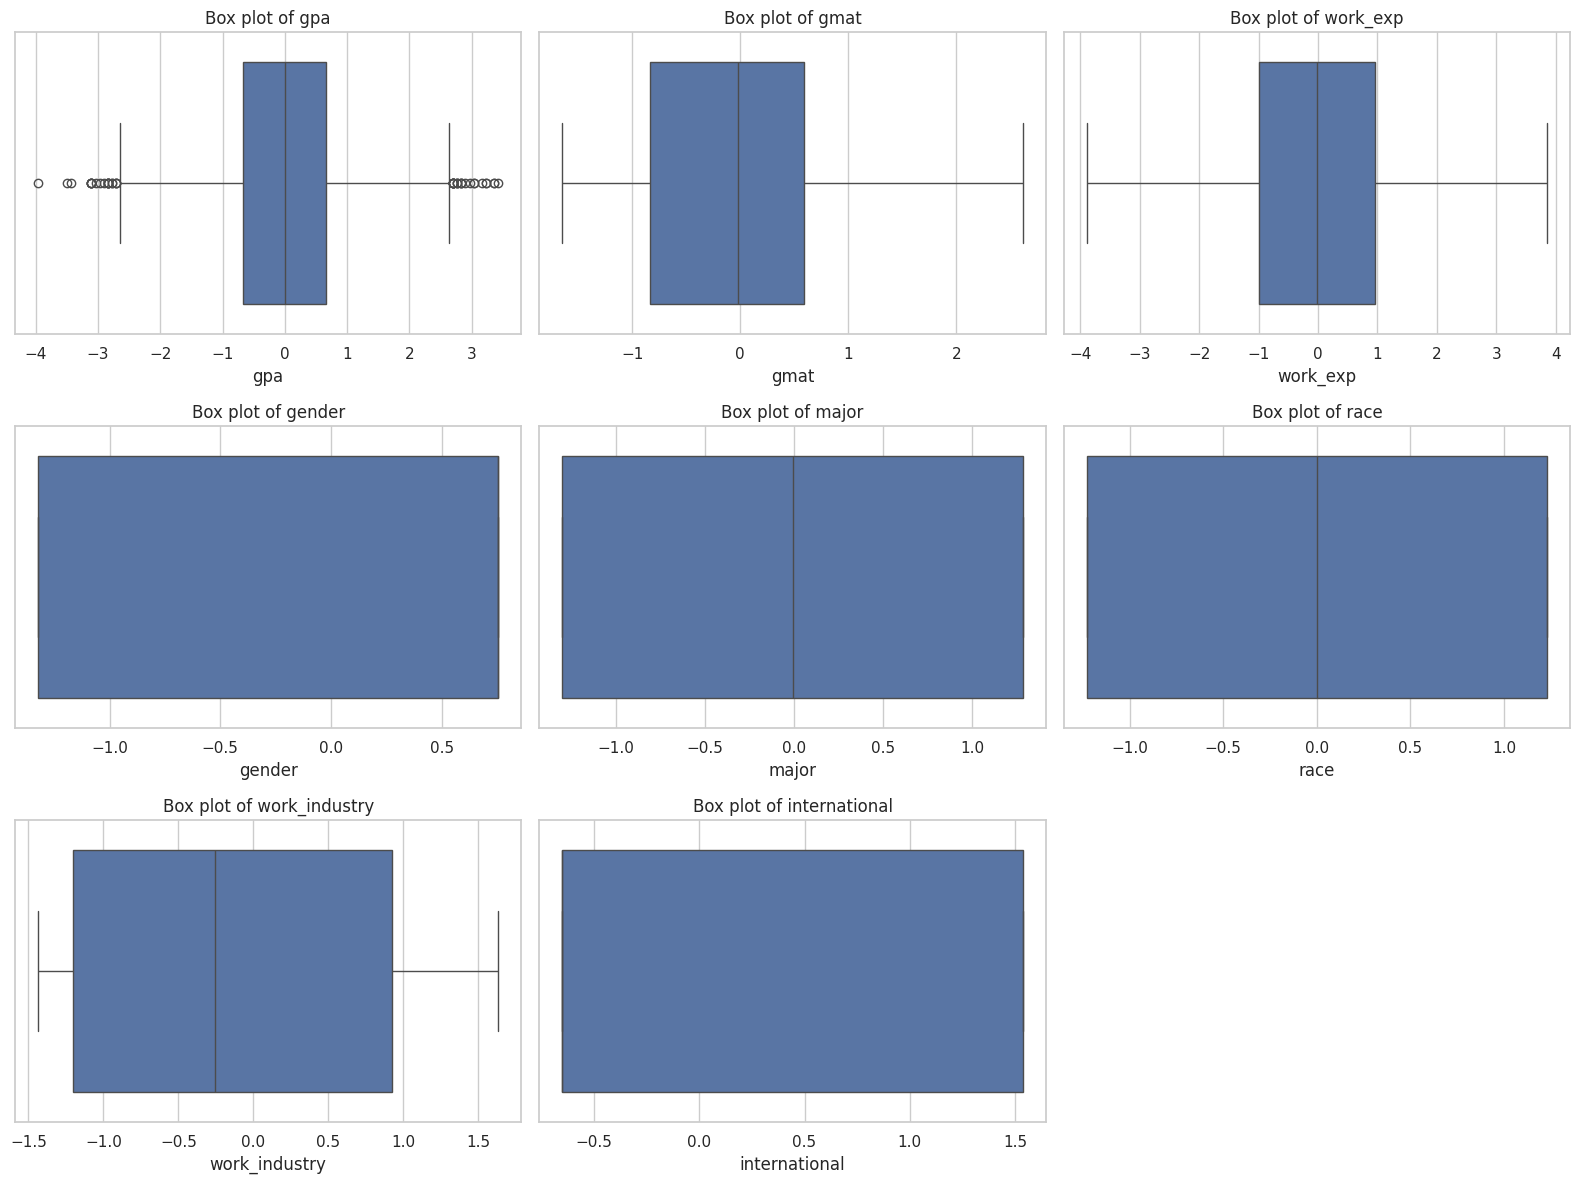

In [8]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Plot box plots for each feature in the dataset
# We will exclude the 'Cluster' column if already added, and any non-numeric columns
features = data.select_dtypes(include=[np.number]).columns.tolist()  # Select numeric columns

plt.figure(figsize=(16, 12))  # Adjust size for better readability
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid as per the number of features
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


Evaluate the clusters using elbow method

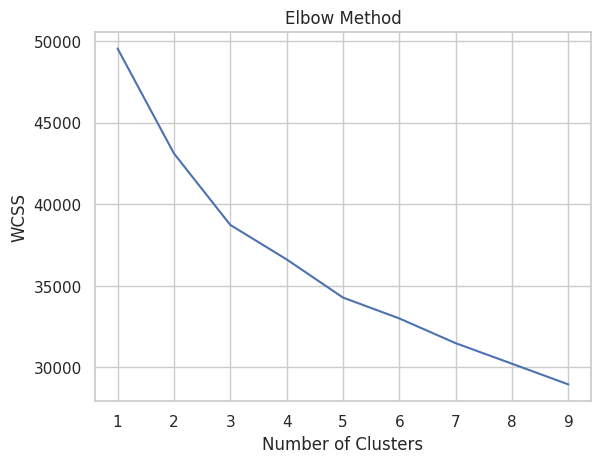

In [12]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<ipython-input-24-c98f0a599518>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Admission'] = np.where(kmeans.labels_ == 0, 'Waitlist', 'Admit')


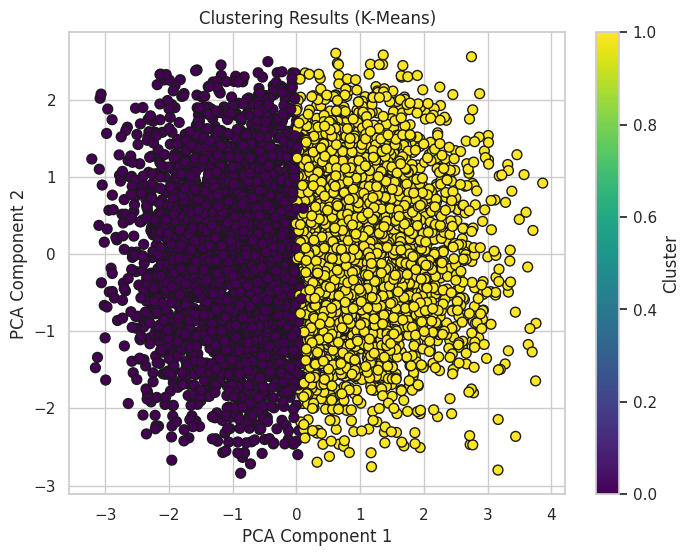

In [24]:
# Remove outliers based on Z-Score threshold (e.g., |z| > 3 is considered an outlier)
z_scores = np.abs(stats.zscore(data))  # Get absolute z-scores
filtered_entries = (z_scores < 3).all(axis=1)  # Filter rows where all z-scores are within 3
data_filtered = data[filtered_entries]  # Create a filtered DataFrame

# Apply K-Means Clustering with k-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_filtered)

# Map the cluster labels to 'Waitlist' and 'Admit'
data_filtered['Admission'] = np.where(kmeans.labels_ == 0, 'Waitlist', 'Admit')

# Visualize Clusters using PCA (reducing to 2D for visualization purposes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_filtered.drop(columns=['Admission']))  # Exclude 'Admission' for PCA

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clustering Results (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)


Cluster sizes: {0: 3214, 1: 2959}


In [28]:
data_filtered['Cluster'] = kmeans.labels_

# Calculate the means of each feature for each admission status and cluster
cluster_means = data_filtered.groupby(['Cluster', 'Admission']).mean().reset_index()

# Display the means
print(cluster_means)

   Cluster Admission       gpa      gmat  work_exp    gender     major  \
0        0  Waitlist -0.661569 -0.708258 -0.005872 -0.038153 -0.011332   
1        1     Admit  0.720177  0.768354  0.005185  0.042403  0.011927   

       race  work_industry  international  
0  0.014208      -0.018013       0.032812  
1 -0.014611       0.019543      -0.034720  


<ipython-input-28-4410ada4c0a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans.labels_


In [25]:
# Calculate the count of each admission status
admission_counts = data_filtered['Admission'].value_counts()

# Calculate the total number of entries
total_count = admission_counts.sum()

# Calculate the percentages
admission_percentages = (admission_counts / total_count) * 100

# Display the results
print("Admission Status Counts:")
print(admission_counts)
print("\nAdmission Status Percentages:")
print(admission_percentages)


Admission Status Counts:
Admission
Waitlist    3214
Admit       2959
Name: count, dtype: int64

Admission Status Percentages:
Admission
Waitlist    52.065446
Admit       47.934554
Name: count, dtype: float64


In [27]:
from google.colab import files

data_filtered.to_csv('data.csv', index=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Supervised Learning Using Clustered 'Admission' Results**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [35]:
from google.colab import files
import io
import pandas as pd


uploaded = files.upload()
for file_name in uploaded.keys():
    data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')

Saving Preprocessed Data with Admissions.csv to Preprocessed Data with Admissions (1).csv


In [36]:
data.head()

,gpa,gmat,work_exp,gender,major,race,work_industry,international,Admission
0,0.325261,-0.630806,-1.953750,-1.323505,-1.299339,-1.228405,-0.727969,-0.650579,Waitlist
1,0.193273,0.586457,-0.016421,0.755569,-0.007716,-0.613507,-0.019409,-0.650579,Admit
2,0.325261,1.195089,-0.016421,-1.323505,-1.299339,-0.613507,1.633897,1.537091,Admit
3,1.447159,0.789334,0.952244,0.755569,1.283908,-0.613507,1.633897,-0.650579,Admit
4,0.655231,-1.239437,-0.016421,0.755569,1.283908,0.001390,-1.200342,-0.650579,Waitlist


In [37]:
data['Admission'] = data['Admission'].map({'Waitlist': 0, 'Admit': 1})

In [48]:
# Define features (X) and target (y)
X = data.drop(columns=['Admission'])  # Features (everything except the target column)
y = data['Admission']  # Target column

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the deep learning model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dropout(0.5),  # Another Dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    batch_size=32,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Define features (X) and target (y)
X = data.drop(columns=['Admission'])  # Features (everything except the target column)
y = data['Admission']  # Target column

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the deep learning model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dropout(0.5),  # Another Dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    batch_size=32,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Define features (X) and target (y)
X = data.drop(columns=['Admission'])  # Features (everything except the target column)
y = data['Admission']  # Target column

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the deep learning model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dropout(0.5),  # Another Dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=2,
                    batch_size=32,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# After evaluating the model on the test set, generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Generate a classification report (including precision, recall, and F1-score)
report = classification_report(y_test, y_pred, target_names=['Waitlist', 'Admit'])
print(report)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6460 - loss: 0.6177 - val_accuracy: 0.9643 - val_loss: 0.1985
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2543 - val_accuracy: 0.9870 - val_loss: 0.0769
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9458 - loss: 0.1423 - val_accuracy: 0.9951 - val_loss: 0.0494
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9628 - loss: 0.0976 - val_accuracy: 0.9968 - val_loss: 0.0366
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9675 - loss: 0.0809 - val_accuracy: 0.9968 - val_loss: 0.0279
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9995 - loss: 0.0219 
Test Accuracy: 0.9968
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6816 - loss: 0.5885 - val_accuracy: 0.9887 - val_loss: 0.1545
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.2051 - val_accuracy: 0.9951 - val_loss: 0.0666
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1265 - val_accuracy: 0.9903 - val_loss: 0.0460
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.0931 - val_accuracy: 0.9968 - val_loss: 0.0353
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9680 - loss: 0.0799 - val_accuracy: 0.9984 - val_loss: 0.0289
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0235 
Test Accuracy: 0.9984


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6959 - loss: 0.5650 - val_accuracy: 0.9838 - val_loss: 0.1595
Epoch 2/2
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.1974 - val_accuracy: 0.9838 - val_loss: 0.0712
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0585 
Test Accuracy: 0.9919
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

    Waitlist       0.98      1.00      0.99       328
       Admit       1.00      0.98      0.99       290

    accuracy                           0.99       618
   macro avg       0.99      0.99      0.99       618
weighted avg       0.99      0.99      0.99       618

